<a href="https://colab.research.google.com/github/withspencerr/churn-prediction-with-shap/blob/main/churn_with_shap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[LightGBM] [Info] Number of positive: 1213, number of negative: 2787
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000634 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.303250 -> initscore=-0.831869
[LightGBM] [Info] Start training from score -0.831869


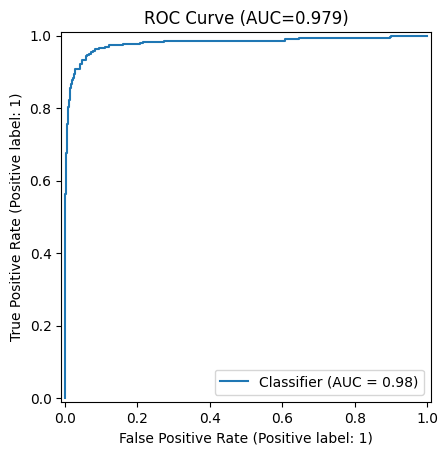

/usr/local/lib/python3.12/dist-packages/shap/explainers/_tree.py:586: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(
/tmp/ipython-input-2753656182.py:39: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, plot_type="bar", show=True)


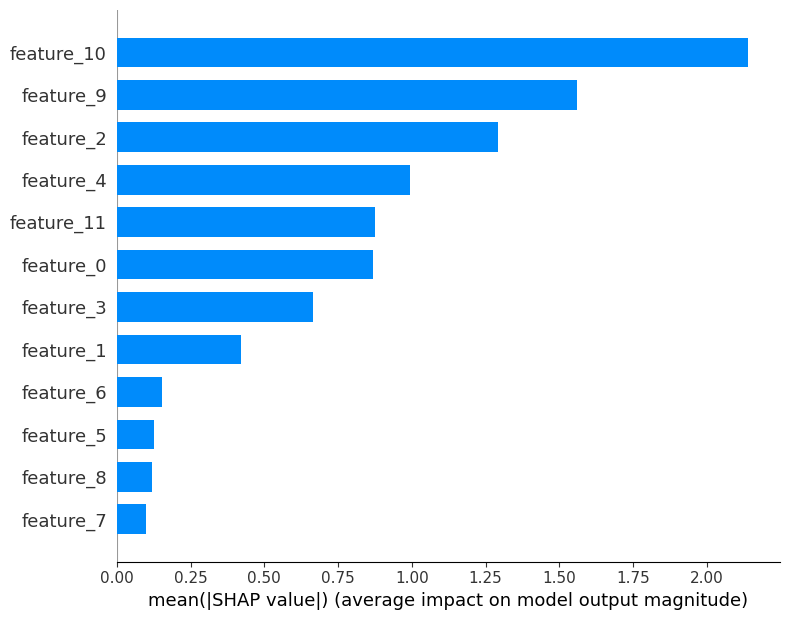

/tmp/ipython-input-2753656182.py:40: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, show=True)


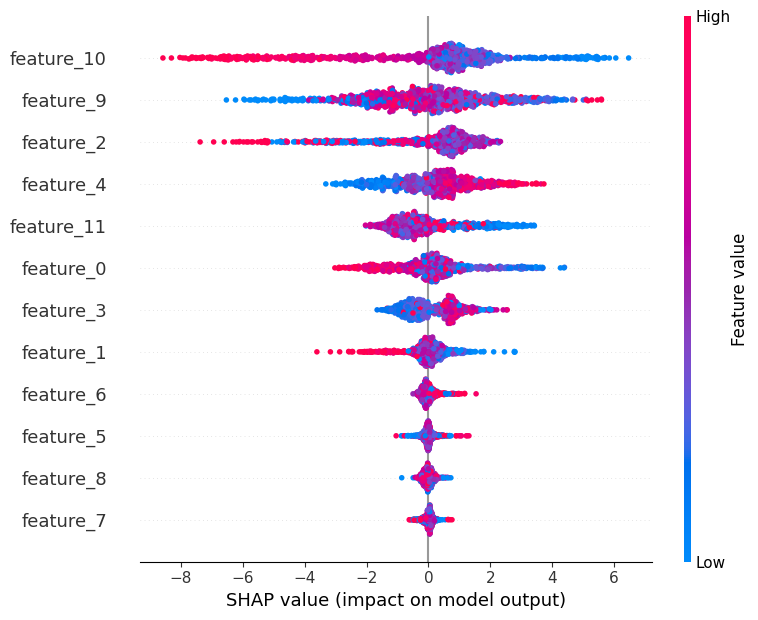

AUC: 0.979


In [2]:
# Churn Prediction with SHAP – Colab Minimal
# 目标：模拟客户流失预测，使用 LightGBM 模型 + SHAP 可解释性

!pip -q install lightgbm shap

import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from lightgbm import LGBMClassifier
import shap

np.random.seed(7)

# ===== 1) 合成数据（模拟客户特征）=====
X, y = make_classification(n_samples=5000, n_features=12,
                           n_informative=6, n_redundant=2,
                           weights=[0.7, 0.3], class_sep=1.2, random_state=7)
cols = [f"feature_{i}" for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=cols); df['churn']=y

# ===== 2) 训练集/测试集 =====
X_train, X_test, y_train, y_test = train_test_split(df[cols], df['churn'],
                                                    test_size=0.2, stratify=df['churn'], random_state=7)

# ===== 3) 训练 LightGBM 模型 =====
model = LGBMClassifier(n_estimators=400, learning_rate=0.05, subsample=0.9, colsample_bytree=0.9, random_state=7)
model.fit(X_train, y_train)
pred_prob = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, pred_prob)

# ===== 4) AUC 曲线 =====
RocCurveDisplay.from_predictions(y_test, pred_prob)
plt.title(f'ROC Curve (AUC={auc:.3f})'); plt.show()

# ===== 5) SHAP 可解释性 =====
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar", show=True)
shap.summary_plot(shap_values, X_test, show=True)

print(f"AUC: {auc:.3f}")